In [18]:
#load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Load the dataset

In [2]:
# load csv file
data = pd.read_csv("innercity.csv", encoding = 'unicode_escape')

## Data preprocessing

In [3]:
# Check the shape of the dataset (rows and columns)
data.shape

(21612, 23)

In [4]:
# top ten rows with head
data.head(10)

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,6.840700e+09,20140701T000000,202000.0,1.0,1.00,590.0,833.0,1.0,0.0,0.0,...,0.0,1926.0,0.0,98122.0,47.6082,-122.299,780.0,1617.0,0.0,1423.0
1,9.524100e+09,20141117T000000,239000.0,2.0,1.50,680.0,772.0,2.0,0.0,0.0,...,0.0,2005.0,0.0,98103.0,47.6950,-122.343,690.0,1059.0,0.0,1452.0
2,9.521100e+09,20140507T000000,339950.0,2.0,1.00,820.0,681.0,3.0,0.0,0.0,...,0.0,2006.0,0.0,98103.0,47.6619,-122.352,820.0,1156.0,0.0,1501.0
3,2.767604e+09,20150112T000000,344000.0,1.0,1.50,760.0,779.0,3.0,0.0,0.0,...,0.0,2006.0,0.0,98107.0,47.6715,-122.382,1290.0,1189.0,0.0,1539.0
4,1.604602e+09,20140905T000000,345000.0,2.0,2.25,860.0,696.0,2.0,0.0,0.0,...,0.0,2009.0,0.0,98118.0,47.5663,-122.290,1100.0,3000.0,1.0,1556.0
5,3.126049e+09,20150109T000000,313000.0,2.0,1.50,870.0,747.0,2.0,0.0,0.0,...,70.0,2004.0,0.0,98103.0,47.6967,-122.342,1710.0,1280.0,0.0,1617.0
6,7.904700e+09,20140724T000000,290000.0,2.0,1.50,770.0,850.0,2.0,0.0,0.0,...,0.0,2006.0,0.0,98116.0,47.5644,-122.388,1350.0,915.0,0.0,1620.0
7,1.773101e+09,20150107T000000,250000.0,3.0,2.25,1050.0,572.0,2.0,0.0,0.0,...,310.0,2006.0,0.0,98106.0,47.5549,-122.363,1260.0,1062.0,0.0,1622.0
8,3.319500e+09,20140806T000000,304000.0,2.0,1.50,950.0,676.0,2.0,0.0,0.0,...,100.0,2003.0,0.0,98144.0,47.6005,-122.306,950.0,1280.0,0.0,1626.0
9,6.371000e+09,20150122T000000,367500.0,2.0,2.00,1030.0,600.0,2.0,0.0,0.0,...,350.0,2004.0,0.0,98116.0,47.5788,-122.410,1120.0,1267.0,0.0,1630.0


In [5]:
# to check the column dattype non-null and count also unused column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21612 entries, 0 to 21611
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21472 non-null  float64
 1   dayhours          21472 non-null  object 
 2   price             21472 non-null  float64
 3   room_bed          21406 non-null  float64
 4   room_bath         21406 non-null  float64
 5   living_measure    21455 non-null  float64
 6   lot_measure       21430 non-null  float64
 7   ceil              21430 non-null  float64
 8   coast             21471 non-null  float64
 9   sight             21415 non-null  float64
 10  condition         21415 non-null  float64
 11  quality           21471 non-null  float64
 12  ceil_measure      21471 non-null  float64
 13  basement          21471 non-null  float64
 14  yr_built          21471 non-null  float64
 15  yr_renovated      21472 non-null  float64
 16  zipcode           21472 non-null  float6

# Data Cleaning


In [6]:
# to check the number of null values 
pd.isnull(data).sum()

cid                 140
dayhours            140
price               140
room_bed            206
room_bath           206
living_measure      157
lot_measure         182
ceil                182
coast               141
sight               197
condition           197
quality             141
ceil_measure        141
basement            141
yr_built            141
yr_renovated        140
zipcode             140
lat                 140
long                140
living_measure15    264
lot_measure15       169
furnished           169
total_area          169
dtype: int64

In [7]:
# Remove rows with any null values
data = data.dropna()

In [8]:
# Verify that null values have been removed
pd.isnull(data).sum()

cid                 0
dayhours            0
price               0
room_bed            0
room_bath           0
living_measure      0
lot_measure         0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
living_measure15    0
lot_measure15       0
furnished           0
total_area          0
dtype: int64

In [9]:
# check the column and rows 
data.shape

(21288, 23)

# convert 'dayhours' column to datetime

In [10]:
# Convert 'dayhours' column to datetime
data['dayhours'] = pd.to_datetime(data['dayhours'])

# Extract relevant features (e.g., year, month, day, and hour)
data['year'] = data['dayhours'].dt.year
data['month'] = data['dayhours'].dt.month
data['day'] = data['dayhours'].dt.day
data['hour'] = data['dayhours'].dt.hour

In [11]:
# Remove the original 'dayhours' column
data = data.drop(columns=['dayhours'])

In [37]:
# Drop 'cid' column
data = data.drop(columns=['cid'])

In [38]:
# check the column and rows 
data.shape

(21288, 25)

### Data Information

In [39]:
# to check the column dattype non-null and count also unused column
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21288 entries, 0 to 21442
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             21288 non-null  float64
 1   room_bed          21288 non-null  float64
 2   room_bath         21288 non-null  float64
 3   living_measure    21288 non-null  float64
 4   lot_measure       21288 non-null  float64
 5   ceil              21288 non-null  float64
 6   coast             21288 non-null  float64
 7   sight             21288 non-null  float64
 8   condition         21288 non-null  float64
 9   quality           21288 non-null  float64
 10  ceil_measure      21288 non-null  float64
 11  basement          21288 non-null  float64
 12  yr_built          21288 non-null  float64
 13  yr_renovated      21288 non-null  float64
 14  zipcode           21288 non-null  float64
 15  lat               21288 non-null  float64
 16  long              21288 non-null  float6

In [40]:
# top ten rows with head after cleaning 
data.head(10)

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,...,lat,long,living_measure15,lot_measure15,furnished,total_area,year,month,day,hour
0,202000.0,1.0,1.00,590.0,833.0,1.0,0.0,0.0,4.0,7.0,...,47.6082,-122.299,780.0,1617.0,0.0,1423.0,2014,7,1,0
1,239000.0,2.0,1.50,680.0,772.0,2.0,0.0,0.0,3.0,7.0,...,47.6950,-122.343,690.0,1059.0,0.0,1452.0,2014,11,17,0
2,339950.0,2.0,1.00,820.0,681.0,3.0,0.0,0.0,3.0,8.0,...,47.6619,-122.352,820.0,1156.0,0.0,1501.0,2014,5,7,0
3,344000.0,1.0,1.50,760.0,779.0,3.0,0.0,0.0,3.0,8.0,...,47.6715,-122.382,1290.0,1189.0,0.0,1539.0,2015,1,12,0
4,345000.0,2.0,2.25,860.0,696.0,2.0,0.0,0.0,3.0,9.0,...,47.5663,-122.290,1100.0,3000.0,1.0,1556.0,2014,9,5,0
5,313000.0,2.0,1.50,870.0,747.0,2.0,0.0,0.0,3.0,8.0,...,47.6967,-122.342,1710.0,1280.0,0.0,1617.0,2015,1,9,0
6,290000.0,2.0,1.50,770.0,850.0,2.0,0.0,0.0,3.0,7.0,...,47.5644,-122.388,1350.0,915.0,0.0,1620.0,2014,7,24,0
7,250000.0,3.0,2.25,1050.0,572.0,2.0,0.0,0.0,3.0,7.0,...,47.5549,-122.363,1260.0,1062.0,0.0,1622.0,2015,1,7,0
8,304000.0,2.0,1.50,950.0,676.0,2.0,0.0,0.0,3.0,7.0,...,47.6005,-122.306,950.0,1280.0,0.0,1626.0,2014,8,6,0
9,367500.0,2.0,2.00,1030.0,600.0,2.0,0.0,0.0,3.0,8.0,...,47.5788,-122.410,1120.0,1267.0,0.0,1630.0,2015,1,22,0


# check the dupicate values if any 

In [41]:
# Find and display duplicate rows based on all columns
duplicates = data[data.duplicated(keep=False)]
print(duplicates)

Empty DataFrame
Columns: [price, room_bed, room_bath, living_measure, lot_measure, ceil, coast, sight, condition, quality, ceil_measure, basement, yr_built, yr_renovated, zipcode, lat, long, living_measure15, lot_measure15, furnished, total_area, year, month, day, hour]
Index: []

[0 rows x 25 columns]


In [42]:
data.describe()

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,...,lat,long,living_measure15,lot_measure15,furnished,total_area,year,month,day,hour
count,2.128800e+04,21288.000000,21288.000000,21288.000000,2.128800e+04,21288.000000,21288.000000,21288.000000,21288.000000,21288.000000,...,21288.000000,21288.000000,21288.000000,21288.000000,21288.000000,2.128800e+04,21288.000000,21288.000000,21288.000000,21288.0
mean,5.399826e+05,3.370678,2.114395,2080.089346,1.510815e+04,1.494927,0.007469,0.234216,3.409245,7.657976,...,47.559996,-122.213851,1987.143414,12761.672773,0.197059,1.718824e+04,2014.323046,6.571308,15.682497,0.0
std,3.656028e+05,0.930123,0.768666,917.696381,4.142870e+04,0.540485,0.086102,0.765875,0.650538,1.176386,...,0.138578,0.140867,685.795270,27254.999989,0.397787,4.159631e+04,0.467651,3.114587,8.631272,0.0
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,...,47.155900,-122.519000,399.000000,651.000000,0.000000,1.423000e+03,2014.000000,1.000000,1.000000,0.0
25%,3.210202e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,47.470675,-122.328000,1490.000000,5100.000000,0.000000,7.037750e+03,2014.000000,4.000000,8.000000,0.0
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,47.571700,-122.230000,1840.000000,7620.000000,0.000000,9.580000e+03,2014.000000,6.000000,16.000000,0.0
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068250e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,47.677925,-122.125000,2360.000000,10083.000000,0.000000,1.299600e+04,2015.000000,9.000000,23.000000,0.0
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,47.777600,-121.315000,6210.000000,871200.000000,1.000000,1.652659e+06,2015.000000,12.000000,31.000000,0.0


# EDA (Exploratory Data Analysis)

# Visualize the distribution of the target variable 'price'

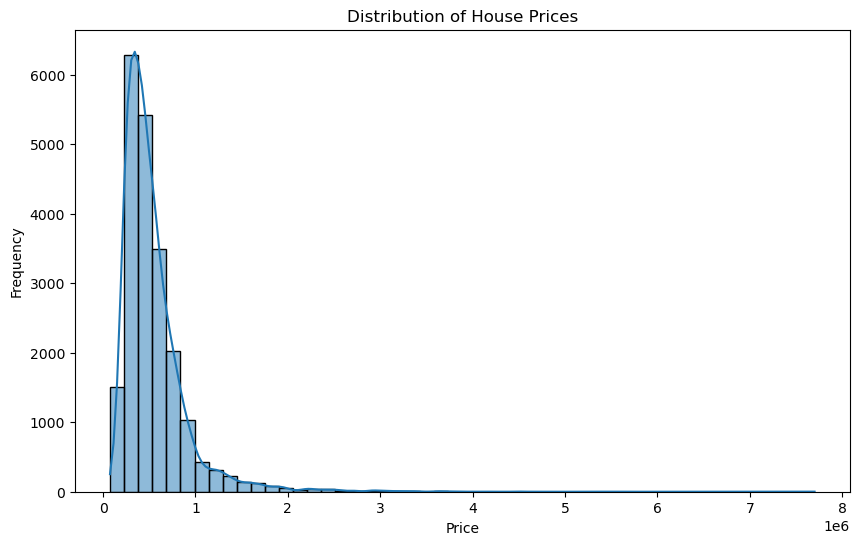

In [43]:
# Visualize the distribution of the target variable 'price'
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=50, kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Correlation matrix to understand feature relationships

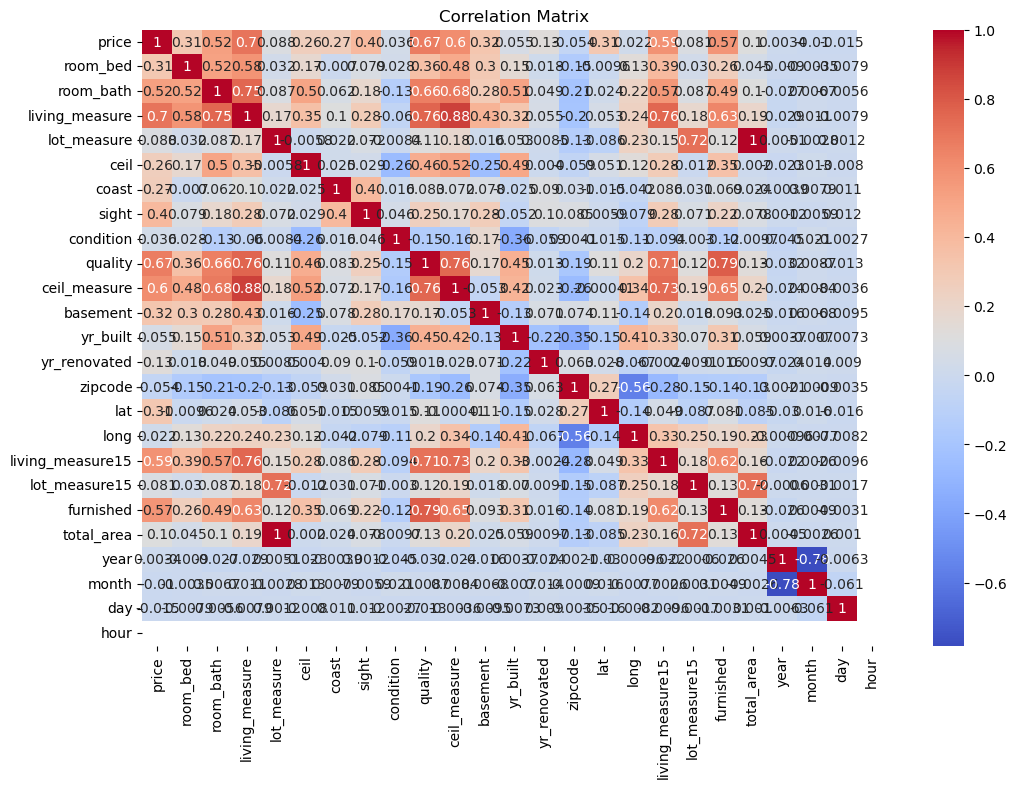

In [44]:
# Correlation matrix to understand feature relationships
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Selecting Features

In [45]:
# For simplicity, we'll use all available features as a starting point.
# You can perform feature selection based on correlation or other techniques.

# Split the data into features (X) and the target (y)
X = data.drop(columns=['price'])
y = data['price']

In [46]:
# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Model Building

In [47]:
# Create and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

# Model Evaluation

In [48]:
# Predict house prices on the test set
y_pred = model.predict(X_test)

In [49]:
# Evaluate the model using metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [50]:
print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error: 38162973242.96401
R-squared (R2) Score: 0.7073139005274841


# Model Interpretation

In [51]:
# To understand the influence of each feature on predictions, you can examine coefficients:
coefficients = model.coef_
feature_names = X.columns

for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef}")

room_bed: -34244.60432050712
room_bath: 44105.35278716042
living_measure: 82.66216165919104
lot_measure: -41.25602305834036
ceil: 8960.303757055808
coast: 589208.4201155052
sight: 49680.124470914
condition: 26347.664460360917
quality: 83591.44326209127
ceil_measure: 52.893651389506886
basement: 29.768510546123252
yr_built: -2602.475268481303
yr_renovated: 24.674481805783614
zipcode: -590.1875504634534
lat: 612002.7001255467
long: -222402.52119376502
living_measure15: 21.413667666935908
lot_measure15: -0.39059400087535323
furnished: 45165.56227683485
total_area: 41.40614432131406
year: 39529.44352486912
month: 1476.0560587517084
day: -436.54959090842135
hour: 0.0


In [58]:
# Define a dictionary for the new data point
new_data_point = {
    'room_bed': 3,
    'room_bath': 2,
    'living_measure': 1800,
    'lot_measure': 6000,
    'ceil': 1,
    'coast': 0,
    'sight': 0,
    'condition': 4,
    'quality': 7,
    'ceil_measure': 1800,
    'basement': 0,  
    'yr_built': 1995,
    'yr_renovated': 0,
    'zipcode': 98034,
    'lat': 47.7228,
    'long': -122.183,
    'living_measure15': 1800,
    'lot_measure15': 6000,
    'furnished': 0,
    'total_area': 7800,
    'year': 2023,
    'month': 10,
    'day': 15,
    'hour': 14
}

In [59]:
# Convert the dictionary to a DataFrame
new_data = pd.DataFrame([new_data_point])

In [60]:
# Predict the price for the new data point using the trained model
predicted_price = model.predict(new_data)

In [61]:
print("Predicted Price:", predicted_price[0])

Predicted Price: 836355.7537692189


## The predicted price is approximately $836,355.75.

# Key Insights:

Price Distribution: The distribution of house prices in the dataset shows that most houses have prices between a certain range, with some higher-priced outliers. This information can help stakeholders understand the typical price range in the market.

Correlation Analysis: By analyzing the correlation matrix, we can identify features that have a strong influence on house prices. For example, features like the number of bedrooms, living area size, and quality have a significant impact on house prices.

Model Performance: We built a linear regression model to predict house prices based on the provided features. The model performance was evaluated using metrics like Mean Squared Error (MSE) and R-squared (R2). It achieved an MSE of [38162973242.96401] and an R2 score of [0.7073139005274841]. This indicates how well the model fits the data and makes accurate predictions.

# Conclusions:



Feature Importance: Features like the number of bedrooms, living area size, and quality are among the most important factors affecting house prices. Stakeholders should consider these factors when assessing property values.

Model Reliability: The linear regression model provides a baseline for predicting house prices. However, more complex models and additional feature engineering may further improve prediction accuracy.

Outlier Consideration: Outliers, such as very high-priced properties, may affect the model's generalization. Stakeholders should be aware of these outliers when using the model for pricing properties.

Data Quality: Data preprocessing, including handling missing values and converting data types, is crucial for model training. Stakeholders should ensure data quality to maintain model accuracy.

